In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)
#569개의 샘플, 30개의 특성

(569, 30) (569,)


In [3]:
#처음 새개의 특성 print
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

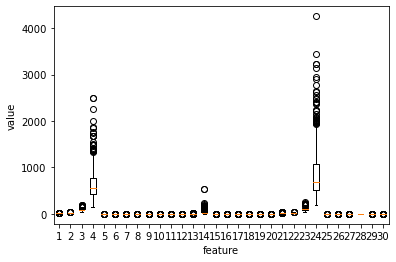

In [4]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [5]:
cancer.feature_names[[3,13,23]] #4,14,24 번째 특성 확인

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [6]:
np.unique(cancer.target, return_counts=True) #0(음성생플_양성종양): 212개, 1(양성샘플_악성종양): 357개

(array([0, 1]), array([212, 357], dtype=int64))

In [7]:
#데이터 세트 지정
x=cancer.data
y=cancer.target

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
#stratify=y :훈련 데이터를 나눌 때 클래스 비율을 동일하게 만들어줌
#test_size=0.2 (80:20)으로 (훈련, 테스트) 세트로 나눔
#random_state 를 숫자로 지정하여 항상 무작위로 나누는 결과가 항상 일정하도록

In [9]:
print(x_train.shape, x_test.shape)
#test_size=0.2 로 4:1 비율로 훈련, 테스트 세트 나눔. 뒤에 30은 특성의 개수

(455, 30) (114, 30)


In [10]:
np.unique(y_train, return_counts=True) #train data 의 음성 양성 데이터 비율=훈련데이터세트 전체의 음성 양성 데이터 비율

(array([0, 1]), array([170, 285], dtype=int64))

In [11]:
class LogisticNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    def forpass(self, x):
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self, x, err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad
    def activation(self, z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self, x, y, epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range (epochs):
            for x_i, y_i in zip(x,y):
                z=self.forpass(x_i)
                a=self.activation(z)
                err=-(y_i-a)
                w_grad, b_grad=self.backprop(x_i, err)
                self.w-=w_grad
                self.b-=b_grad
    def predict(self, x):
        z=[self.forpass(x_i) for x_i in x]
        a=self.activation(np.array(z))
        return a>0.5 

In [12]:
neuron=LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-11-acc0ce11a812>:13: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


In [13]:
np.mean(neuron.predict(x_test)==y_test)

<ipython-input-11-acc0ce11a812>:13: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


0.8245614035087719

In [16]:
#단일층 신경망
class SingleLayer:
    def __init__(self):
        self.w=None
        self.b=None
        self.losses=[] 
        #손실함수의 결과값을 저장하는 리스트 생성( 각 에포크마다 저장 )
    def forpass(self,x): 
        z=np.sum(x*self.w)+self.b #직선 방정식 계산
        return z
    def backprop(self,x,err):
        w_grad=x*err #가중치에 대한 그레디언트 계산
        b_grad=1*err #절편에 대한 그레디언트 계산
        return w_grad, b_grad
    def activation(self,z):
        a=1/(1+np.exp(-z)) 
        #활성화함수 계산 (로지스틱 회귀는 시그모이드 함수 이용)
        return a
    def fit(self,x,y,epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0 
        #가중치와 절편 초기화
        for i in range (epochs):
            loss=0
            indexes=np.random.permutation(np.arange(len(x)))
            #매 에포크마다 훈련 세트의 샘플 순서를 섞어서 사용
            #넘파이 배열의 인덱스를 섞은 후 인덱스 순서대로 샘플을 뽑음
            #가중치의 최적값의 탐색 과정이 다양해서 가중치의 최적값을 제대로 찾을 수 있음
            for i in indexes: #모든 샘플에 대하여 반복
                z=self.forpass(x[i]) #정방형 계산
                a=self.activation(z) #활성화 함수 적용
                err=-(y[i]-a) # 오차계산 
                w_grad, b_grad=self.backprop(x[i],err) #역방형 계산
                self.w-=w_grad #가중치 업데이트
                self.b-=b_grad #절편 업데이트
                a=np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해서 클리핑 후
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 손실 누적
            self.losses.append(loss/len(y))1 #각 에포크마다 평균 손실 계산하여 저장
    def predict(self, x):
        z=[self.forpass(x_i) for x_i in x] #forpass의 결과를 새 리스트로 생성
        #시그모이드 함수의 출력값은 0에서 1사이, z가 양수냐 음수냐에 따라 
        #출력값은 두개로 나뉨, 따라서 굳이 시그모이드 함수의 출력값으로 갈 필요 없음
        return np.array(z)>0
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

In [17]:
layer=SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test,y_test)

<ipython-input-16-4dffe219e317>:15: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


0.9122807017543859

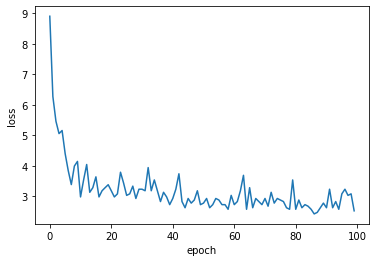

In [18]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [21]:
#사이킷런으로 로지스틱 회귀 수행
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
#max_iter로 최대 반복횟수 설정, tol에 지정한 값만큼 감소되지 않으면 반복을 중단함
#최적값으로 수렴할 정도의 반복 횟수인지 알려주는 역할->tol
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [22]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])